<a href="https://colab.research.google.com/github/NjuChenZhiYu/Bread_Cancer_Predict/blob/develop/%E2%80%9CBreast_Cancer_Prediction(Accuracy_99_74)%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
uciml_breast_cancer_wisconsin_data_path = kagglehub.dataset_download('uciml/breast-cancer-wisconsin-data')

print('Data source import complete.')


Data source import complete.


# Breast Cancer Data Analysis and Predictions

I have tried my best to explain the code very clearly. In this notebook, I will be using 4 classification models- Logistic Regression, K Nearest Neighbours, Random Forests and Support Vector Machines (SVM).

###  Breast Cancer

Breast cancer is cancer that forms in the cells of the breasts.<p>It arises in the lining cells (epithelium) of the ducts (85%) or lobules (15%) in the glandular tissue of the breast. Initially, the cancerous growth is confined to the duct or lobule (“in situ”) where it generally causes no symptoms and has minimal potential for spread (metastasis).<br>
    
Most types of breast cancer are easy to diagnose by microscopic analysis of a sample - or biopsy - of the affected area of the breast. Also, there are types of breast cancer that require specialized lab exams.

# 1. Exploratory Data Analysis

## 1.1 Understanding the data

In [2]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
!gdown --id '1F5Ngf2IelBklAFZmeS0IL2vi5225xRyD' --output cancer_pre_data.csv

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1F5Ngf2IelBklAFZmeS0IL2vi5225xRyD
To: /content/cancer_pre_data.csv
100% 125k/125k [00:00<00:00, 34.7MB/s]


In [4]:
# reading data into the dataframe
df = pd.read_csv('/content/cancer_pre_data.csv')

In [5]:
# displaying first five rows
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
# shape of the dataframe
df.shape

(569, 33)

In [7]:
# concise summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
# column names
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [9]:
# checking for null values
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


The whole column 'Unamed: 32' has NaN values.

In [10]:
# dropping 'Unnamed: 32' column.
df.drop("Unnamed: 32", axis=1, inplace=True)

In [11]:
# dropping id column
df.drop('id',axis=1, inplace=True)

In [12]:
# descriptive statistics of data
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## 1.2. Data Visualizations

/tmp/ipython-input-13-2639374068.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="diagnosis", data=df, palette='magma')


<Axes: xlabel='diagnosis', ylabel='count'>

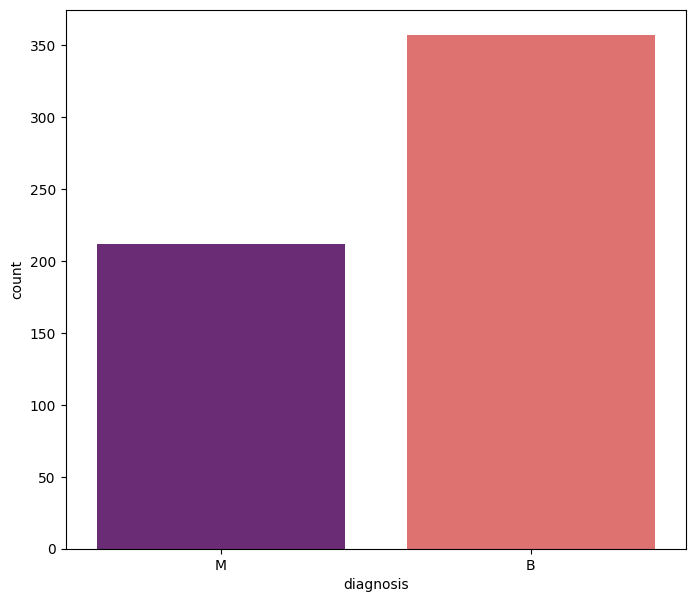

In [13]:
# countplot
plt.figure(figsize = (8,7))
sns.countplot(x="diagnosis", data=df, palette='magma')

<Axes: >

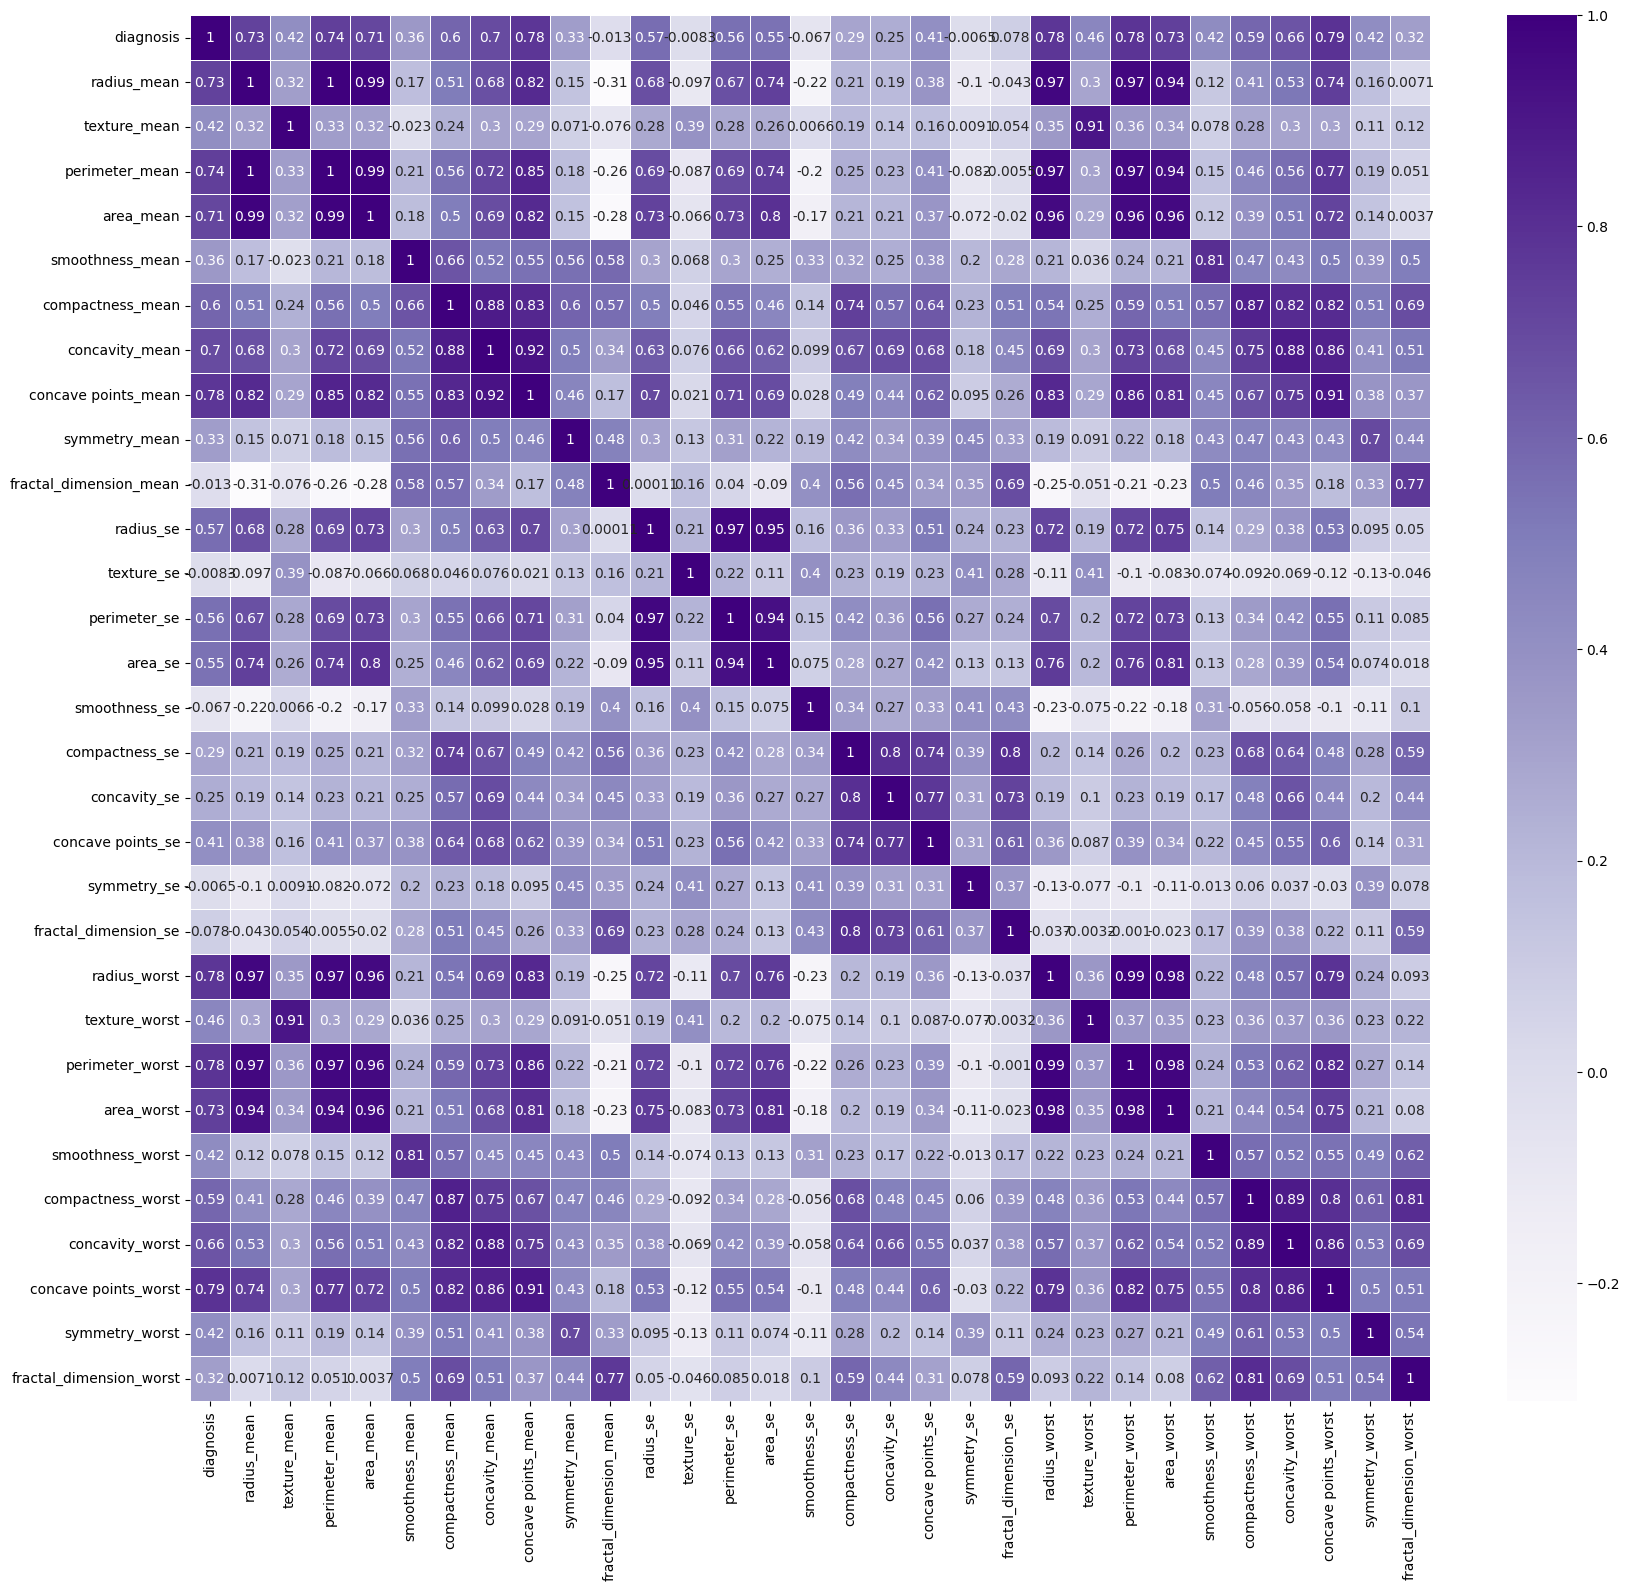

In [14]:
# heatmap
plt.figure(figsize=(20,18))
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})
sns.heatmap(df.corr(), annot=True,linewidths=.5, cmap="Purples")

###From the heatmap, we can observe from the heatmaps that there are many negative correlations in this dataset.

/tmp/ipython-input-15-337960725.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_corr.index, y=target_corr.values, palette='viridis')


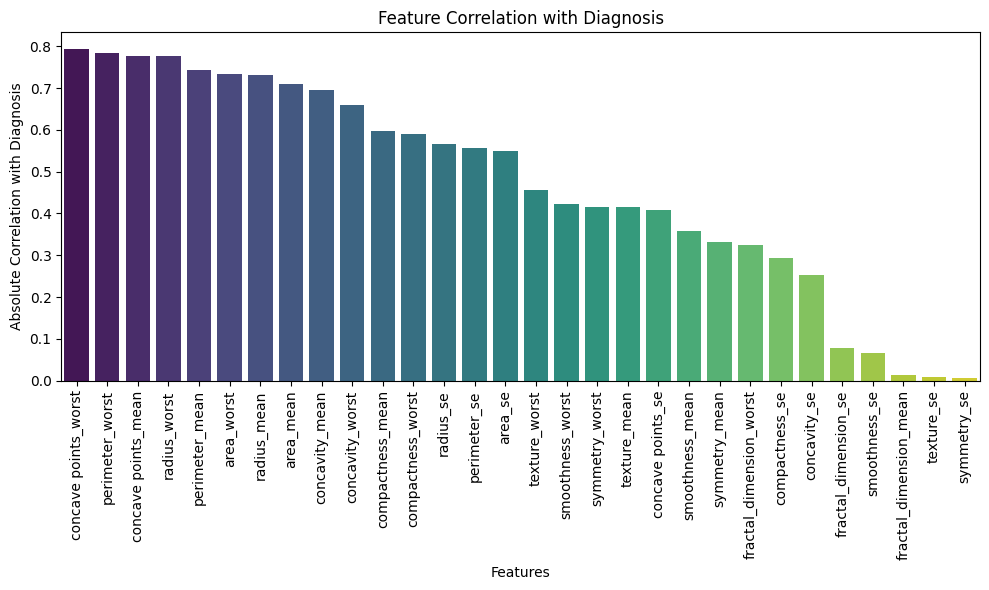

Selected features: ['concave points_worst', 'perimeter_worst', 'concave points_mean', 'radius_worst', 'perimeter_mean', 'area_worst', 'radius_mean', 'area_mean', 'concavity_mean', 'concavity_worst', 'compactness_mean', 'compactness_worst', 'radius_se', 'perimeter_se', 'area_se', 'texture_worst', 'smoothness_worst', 'symmetry_worst', 'texture_mean', 'concave points_se', 'smoothness_mean', 'symmetry_mean', 'fractal_dimension_worst', 'compactness_se', 'concavity_se']


In [15]:
# 1. 获取相关系数矩阵
corr_df = df.corr()

# 2. 选择目标列与其他列的相关系数
target_corr = corr_df['diagnosis'].abs().sort_values(ascending=False)
target_corr = target_corr.drop('diagnosis')
plt.figure(figsize=(10, 6))
sns.barplot(x=target_corr.index, y=target_corr.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Absolute Correlation with Diagnosis')
plt.title('Feature Correlation with Diagnosis')
plt.tight_layout()
plt.show()

# 3. 设置阈值（比如0.25），筛选相关性较强的特征列
threshold = 0.25
selected_features = target_corr[target_corr > threshold].index.tolist()

# 4. 去除目标列本身
#selected_features.remove('diagnosis')

print("Selected features:", selected_features)

# 5. 构建新的数据集，只包含筛选的特征
dataset = df[selected_features + ['diagnosis']]  # 包含标签

In [16]:
print(selected_features)
print(len(selected_features))

['concave points_worst', 'perimeter_worst', 'concave points_mean', 'radius_worst', 'perimeter_mean', 'area_worst', 'radius_mean', 'area_mean', 'concavity_mean', 'concavity_worst', 'compactness_mean', 'compactness_worst', 'radius_se', 'perimeter_se', 'area_se', 'texture_worst', 'smoothness_worst', 'symmetry_worst', 'texture_mean', 'concave points_se', 'smoothness_mean', 'symmetry_mean', 'fractal_dimension_worst', 'compactness_se', 'concavity_se']
25


The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

In [17]:
# Getting Mean Columns with diagnosis
m_col = ['diagnosis','radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

# Getting Se Columns with diagnosis
s_col = ['diagnosis','radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se']

# Getting Worst column with diagnosis
w_col = ['diagnosis','radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

# 2. Data Preprocessing and Building Models

## 2.1 Data Preprocessing

In [18]:
# counts of unique rows in the 'diagnosis' column
df['diagnosis'].value_counts()

,count
diagnosis,
0,357
1,212


## 2.2 Splitting the data into train and test

In [19]:
from sklearn.model_selection import train_test_split

# splitting data
X_train, X_test, y_train, y_test = train_test_split(
                df[selected_features],
                df['diagnosis'],
                test_size=0.2,
                random_state=42)


print("Shape of training set:", X_train.shape)
print("Shape of test set:", X_test.shape)

Shape of training set: (455, 25)
Shape of test set: (114, 25)


In [20]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)      # 先在训练集上拟合
X_test = ss.transform(X_test)              # 用训练集的参数转测试集

#X_train = ss.fit_transform(X_train)
#X_test = ss.fit_transform(X_test)

StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance.(Unit variance means dividing all the values by the standard deviation.)

## 2.3 Classification Models

### 2.3.1 Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
predictions1 = logreg.predict(X_test)

In [22]:
from sklearn.metrics import confusion_matrix, classification_report

print("Confusion Matrix: \n", confusion_matrix(y_test, predictions1))
print('\n')
print(classification_report(y_test, predictions1))

Confusion Matrix: 
 [[70  1]
 [ 2 41]]


              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [23]:
from sklearn.metrics import accuracy_score

logreg_acc = accuracy_score(y_test, predictions1)
print("Accuracy of the Logistic Regression Model is: ", logreg_acc)

Accuracy of the Logistic Regression Model is:  0.9736842105263158


### 2.3.2 K Nearest Neighbours

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
# to find which value shows the lowest mean error
error_rate = []

for i in range(1,42):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

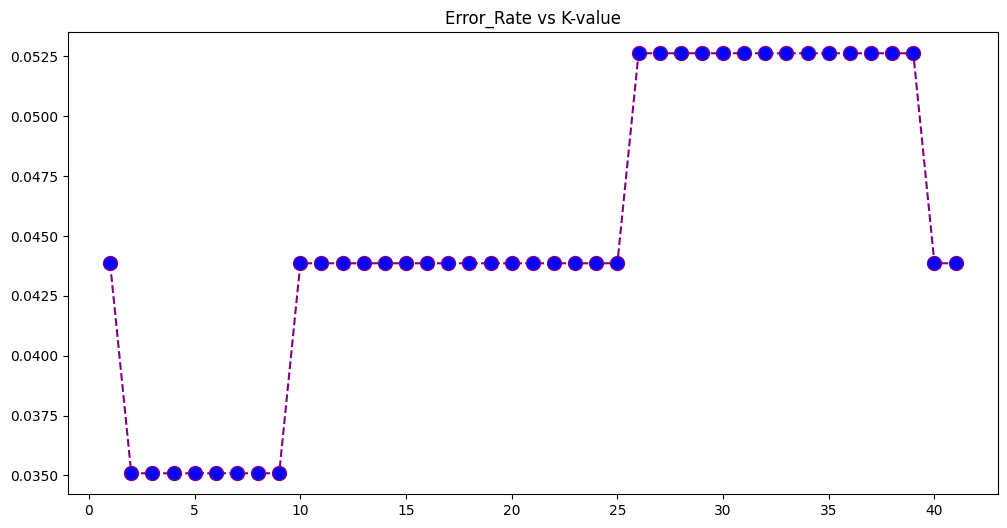

In [26]:
plt.figure(figsize=(12,6))
plt.plot(range(1,42), error_rate, color='purple', linestyle="--",
         marker='o', markersize=10, markerfacecolor='b')
plt.title('Error_Rate vs K-value')
plt.show()

From this graph, K value of 9,34,35,36,40 and 41 seem to show the lowest mean error. So using one of these values

In [27]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
predictions2 = knn.predict(X_test)

In [28]:
print(confusion_matrix(y_test, predictions2))
print("\n")
print(classification_report(y_test, predictions2))

[[69  2]
 [ 2 41]]


              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [29]:
knn_model_acc = accuracy_score(y_test, predictions2)
print("Accuracy of K Neighbors Classifier Model is: ", knn_model_acc)

Accuracy of K Neighbors Classifier Model is:  0.9649122807017544


### 2.3.3 Random Forests

In [30]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(X_train, y_train)
predictions4 = rfc.predict(X_test)

In [31]:
print("Confusion Matrix: \n", confusion_matrix(y_test, predictions4))
print("\n")
print(classification_report(y_test, predictions4))

Confusion Matrix: 
 [[70  1]
 [ 3 40]]


              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [32]:
rfc_acc = accuracy_score(y_test, predictions4)
print("Accuracy of Random Forests Model is: ", rfc_acc)

Accuracy of Random Forests Model is:  0.9649122807017544


### 2.3.4 Support Vector Machines (SVM)

In [33]:
from sklearn.svm import SVC

svc_model = SVC(kernel="rbf")
svc_model.fit(X_train, y_train)
predictions5 = svc_model.predict(X_test)

In [34]:
print("Confusion Matrix: \n", confusion_matrix(y_test, predictions5))
print("\n")
print(classification_report(y_test, predictions5))

Confusion Matrix: 
 [[70  1]
 [ 2 41]]


              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [35]:
svm_acc = accuracy_score(y_test, predictions5)
print("Accuracy of SVM model is: ", svm_acc)

Accuracy of SVM model is:  0.9736842105263158


### 2.3.5 DNN

In [36]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset,Dataset, DataLoader

# For data preprocess
import numpy as np
import csv
import os


In [37]:
# X_train = X_train.values
# X_test = X_test.values
# y_train = y_train.values
y_test = y_test.values


In [38]:
print(torch.cuda.is_available())

True


#### 1. Construct dataset & dataloader

In [39]:
myseed = 42069  # set a random seed for reproducibility
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(myseed)
torch.manual_seed(myseed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(myseed)

In [40]:
# X_train, y_train, X_eval, y_eval（都是numpy数组或tensor）
# 转成PyTorch Tensor
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)  # 分类用long
X_eval_tensor = torch.tensor(X_test, dtype=torch.float32)
y_eval_tensor = torch.tensor(y_test, dtype=torch.long)

# 构建Dataset和DataLoader
train_ds = TensorDataset(X_train_tensor, y_train_tensor)
eval_ds = TensorDataset(X_eval_tensor, y_eval_tensor)

train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)
eval_loader = DataLoader(eval_ds, batch_size=64)


#### 2. Define DNN module

In [41]:
# 定义神经网络模型（示例：简单多层感知机）
class CancerClassifierModel(nn.Module):
    def __init__(self, input_dim=22):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 32),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(32, 2)  # 输出两个类
        )
        self.criterion = nn.CrossEntropyLoss()

    def forward(self, x):
        return self.net(x)

    def cal_loss(self, pred, target):
        loss = self.criterion(pred, target)
        # Add L2 Regularization
        l2_reg = sum(torch.norm(param)**2 for param in self.parameters())
        loss = loss + 1e-4 * l2_reg
        return loss

#### 3. Train & Test

In [42]:
from sklearn.metrics import roc_auc_score


def dev(dv_loader, model):
    model.eval()
    all_targets, all_probs = [], []
    with torch.no_grad():
        for batch_x, batch_y in dv_loader:
            pred = model(batch_x)
            probs = torch.softmax(pred,dim=1)
            all_targets.extend(batch_y.cpu().numpy())
            all_probs.extend(probs[:,1].cpu().numpy())

    return roc_auc_score(all_targets,all_probs)


In [43]:
import os
save_dir = 'models'

# 初始化模型、损失函数、优化器
model = CancerClassifierModel(input_dim=X_train.shape[1])  # 这里假设是二分类
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 训练参数
num_epochs = 200

best_auc = 0


for epoch in range(num_epochs):
    model.train()
    for batch_x, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_x)
        loss = model.cal_loss(outputs, batch_y)
        loss.backward()
        optimizer.step()


    # 评估模型

    dev_auc = dev(eval_loader,model)
    print('epoch = {:4d}, auc = {:.4f}'.format(epoch + 1,dev_auc))
    if dev_auc > best_auc:
         # Save model if your model improved
        best_auc = dev_auc
        print('Saving model (epoch = {:4d}, auc = {:.4f})'
                    .format(epoch + 1, best_auc))
        if not os.path.exists(save_dir):
            os.makedirs(save_dir)
        torch.save(model.state_dict(), os.path.join(save_dir, 'model.pth'))  # Save model to specified path
dnn_auc = best_auc

epoch =    1, auc = 0.9813
Saving model (epoch =    1, auc = 0.9813)
epoch =    2, auc = 0.9971
Saving model (epoch =    2, auc = 0.9971)
epoch =    3, auc = 0.9977
Saving model (epoch =    3, auc = 0.9977)
epoch =    4, auc = 0.9967
epoch =    5, auc = 0.9974
epoch =    6, auc = 0.9974
epoch =    7, auc = 0.9974
epoch =    8, auc = 0.9974
epoch =    9, auc = 0.9974
epoch =   10, auc = 0.9974
epoch =   11, auc = 0.9977
epoch =   12, auc = 0.9977
epoch =   13, auc = 0.9974
epoch =   14, auc = 0.9971
epoch =   15, auc = 0.9974
epoch =   16, auc = 0.9961
epoch =   17, auc = 0.9967
epoch =   18, auc = 0.9964
epoch =   19, auc = 0.9967
epoch =   20, auc = 0.9974
epoch =   21, auc = 0.9974
epoch =   22, auc = 0.9977
epoch =   23, auc = 0.9974
epoch =   24, auc = 0.9974
epoch =   25, auc = 0.9974
epoch =   26, auc = 0.9974
epoch =   27, auc = 0.9967
epoch =   28, auc = 0.9971
epoch =   29, auc = 0.9971
epoch =   30, auc = 0.9967
epoch =   31, auc = 0.9967
epoch =   32, auc = 0.9967
epoch =   

# 3. Final Results

/tmp/ipython-input-44-705794977.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= model_acc, y=model_name, palette='magma')


<Axes: >

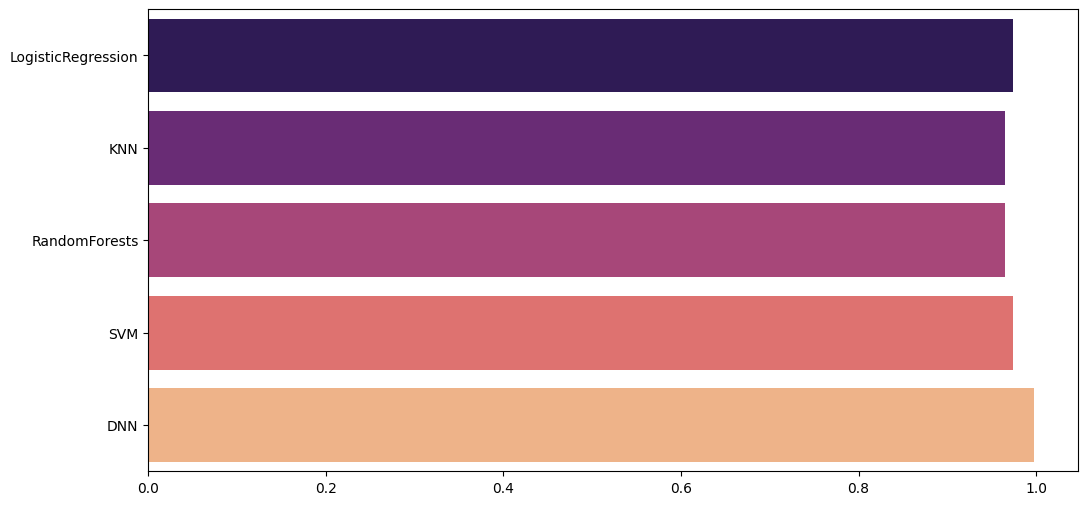

In [44]:
plt.figure(figsize=(12,6))
model_acc = [logreg_acc, knn_model_acc, rfc_acc, svm_acc,dnn_auc]
model_name = ['LogisticRegression', 'KNN', 'RandomForests', 'SVM','DNN']
sns.barplot(x= model_acc, y=model_name, palette='magma')

In [45]:
# logreg_acc, knn_model_acc, rfc_acc, svm_acc, dnn_auc

# 存放模型名和性能的字典
performance = {
    'Logistic Regression (AUC)': logreg_acc,
    'KNN (AUC)': knn_model_acc,
    'Random Forest (AUC)': rfc_acc,
    'SVM (AUC)': svm_acc,
    'Deep Neural Network (AUC)': dnn_auc
}

# 找到最大值和对应的模型名
best_model = max(performance, key=performance.get)
best_performance = performance[best_model]

#输出模型结果
for model_name, score in performance.items():
    print(f"{model_name}: {score:.4f}")


# 输出信息
print(f"{best_model} achieved the best performance with a score of {best_performance:.4f}")


Logistic Regression (AUC): 0.9737
KNN (AUC): 0.9649
Random Forest (AUC): 0.9649
SVM (AUC): 0.9737
Deep Neural Network (AUC): 0.9977
Deep Neural Network (AUC) achieved the best performance with a score of 0.9977


Please give your suggestions.<br>
Upvote if you like the notebook
